# 1. EDA - 완료

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/240128_TripAdvisorHotelReviews/merged.csv')
df.shape

/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_1030/222469946.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/240128_TripAdvisorHotelReviews/merged.csv')


(666421, 29)

In [3]:
refined_df = df.drop(columns=df.columns.difference(['text', 'ratings_overall']))

<Axes: >

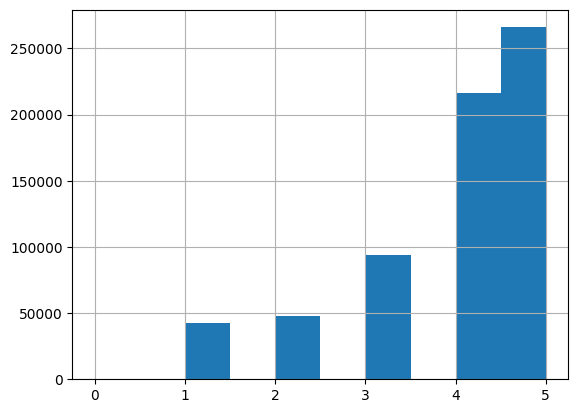

In [4]:
refined_df['ratings_overall'].hist()

In [5]:
# 'ratings_overall' 값을 'low' 또는 'high'로 변환하는 함수 정의
def map_ratings(value):
    if value in [1.0, 2.0, 3.0]:
        return 'low'
    elif value in [4.0, 5.0]:
        return 'high'
    else:
        return 'unknown'  # 다른 값에 대한 처리를 추가할 수도 있습니다.

# 'ratings' 칼럼 생성 및 'ratings_overall' 값에 함수 적용
refined_df['ratings'] = refined_df['ratings_overall'].apply(map_ratings)

# 2. 데이터 전처리

## 2.1 토큰화

In [6]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

2024-02-03 10:56:43.805294: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
text = df['text'].iloc[0]
print('단어 토큰화3 :',text_to_word_sequence(text))

단어 토큰화3 : ['stayed', 'in', 'a', 'king', 'suite', 'for', '11', 'nights', 'and', 'yes', 'it', 'cots', 'us', 'a', 'bit', 'but', 'we', 'were', 'happy', 'with', 'the', 'standard', 'of', 'room', 'the', 'location', 'and', 'the', 'friendliness', 'of', 'the', 'staff', 'our', 'room', 'was', 'on', 'the', '20th', 'floor', 'overlooking', 'broadway', 'and', 'the', 'madhouse', 'of', 'the', 'fairway', 'market', 'room', 'was', 'quite', 'with', 'no', 'noise', 'evident', 'from', 'the', 'hallway', 'or', 'adjoining', 'rooms', 'it', 'was', 'great', 'to', 'be', 'able', 'to', 'open', 'windows', 'when', 'we', 'craved', 'fresh', 'rather', 'than', 'heated', 'air', 'the', 'beds', 'including', 'the', 'fold', 'out', 'sofa', 'bed', 'were', 'comfortable', 'and', 'the', 'rooms', 'were', 'cleaned', 'well', 'wi', 'fi', 'access', 'worked', 'like', 'a', 'dream', 'with', 'only', 'one', 'connectivity', 'issue', 'on', 'our', 'first', 'night', 'and', 'this', 'was', 'promptly', 'responded', 'to', 'with', 'a', 'call', 'from', '

In [8]:
# 'ratings_overall' 값을 'low' 또는 'high'로 변환하는 함수 정의
def tokenizer(text):
    return text_to_word_sequence(text)

# 'ratings' 칼럼 생성 및 'ratings_overall' 값에 함수 적용
refined_df['tokens'] = refined_df['text'].apply(tokenizer)

# 결과 확인
print(refined_df)

                                                     text  ratings_overall  \
0       Stayed in a king suite for 11 nights and yes i...              5.0   
1       On every visit to NYC, the Hotel Beacon is the...              5.0   
2       Our first stay on the upper west side and can'...              5.0   
3       Great room, very big with huge bed! Great loca...              5.0   
4       We go to New York every year and this is where...              5.0   
...                                                   ...              ...   
666416  If you enjoy being greeted every time you get ...              5.0   
666417  This hotel was so beautiful and the people wer...              5.0   
666418  What a great hotel. Ive been visiting Washing ...              5.0   
666419  Such a lovely old hotel that has been refurbis...              5.0   
666420  We couldn't have been happier with our choice ...              5.0   

       ratings                                             toke

### 2.2.3 길이가 짧은 토큰들은 제거해주기

In [9]:
refined_df['tokens'] = refined_df['tokens'].apply(lambda token_list: [word for word in token_list if len(word) > 2])

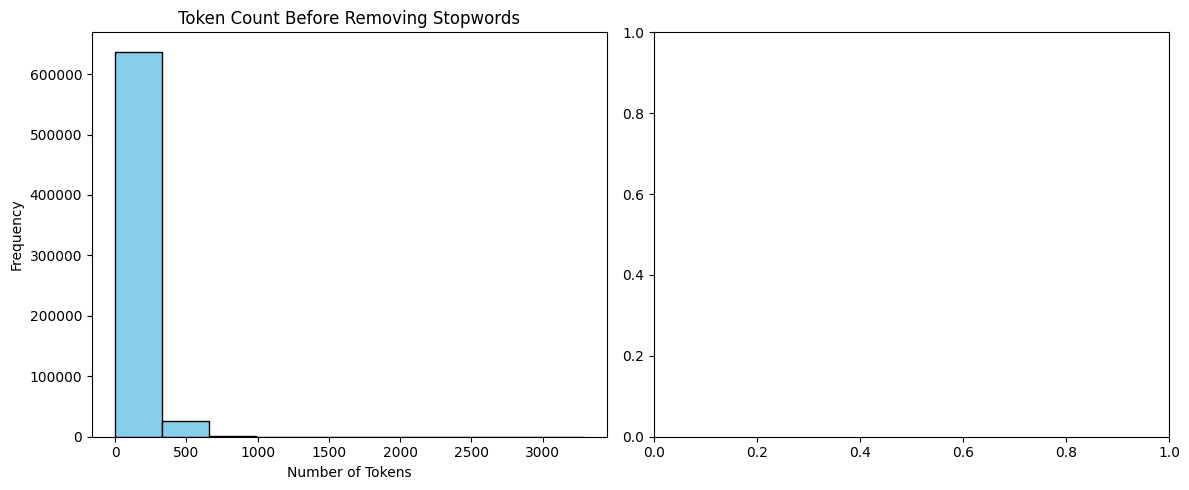

In [10]:
import matplotlib.pyplot as plt


# 불용어 제거 전의 토큰 개수
refined_df['token_count'] = refined_df['tokens'].apply(len)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 불용어 제거 전의 토큰 개수 시각화
axes[0].hist(refined_df['token_count'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Token Count Before Removing Stopwords')
axes[0].set_xlabel('Number of Tokens')
axes[0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 2.2.4 불용어 제거해주기

In [11]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK에서 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/songye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:

# NLTK에서 제공하는 불용어 리스트
stop_words = set(stopwords.words('english'))

# 'tokens' 칼럼에 있는 리스트에서 불용어 제거
refined_df['tokens'] = refined_df['tokens'].apply(lambda token_list: [word for word in token_list if word.lower() not in stop_words])


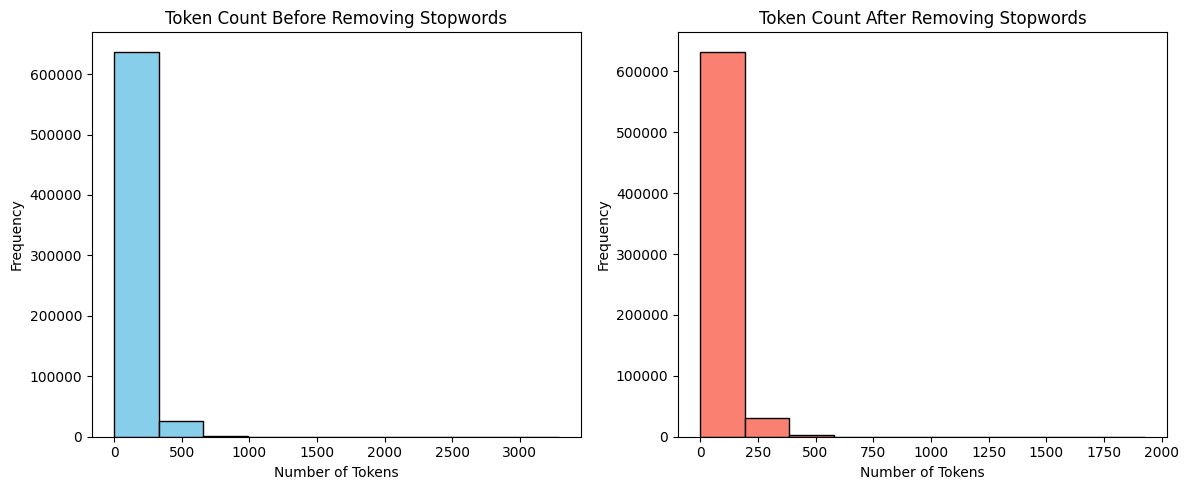

In [13]:

refined_df['token_count_after'] = refined_df['tokens'].apply(len)

# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 불용어 제거 전의 토큰 개수 시각화
axes[0].hist(refined_df['token_count'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Token Count Before Removing Stopwords')
axes[0].set_xlabel('Number of Tokens')
axes[0].set_ylabel('Frequency')

# 불용어 제거 후의 토큰 개수 시각화
axes[1].hist(refined_df['token_count_after'], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Token Count After Removing Stopwords')
axes[1].set_xlabel('Number of Tokens')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 2.2 정제 및 정규화

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# TfidfVectorizer를 사용하여 TF-IDF 행렬 생성
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(refined_df['tokens'].apply(lambda x: ' '.join(x)))

# TF-IDF 행렬을 DataFrame으로 변환 (선택사항, 확인용)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 특정 기준에 따라 단어 선택 (예: TF-IDF 값이 일정 threshold 이상인 경우)
selected_words = tfidf_df.columns[tfidf_df.mean() > 0.1]  # 예시: 평균 TF-IDF 값이 0.1 이상인 단어 선택

# 선택된 단어들로 새로운 'tokens' 칼럼 생성
refined_df['tokens_tfidf'] = refined_df['tokens'].apply(lambda x: [word for word in x if word in selected_words])


: 

## 2.3 불용어 제거

## 2.4 텍스트 벡터화

## 2.5 패딩 처리

# 3. 데이터 분할

# 4. 모델 선택 및 구성

# 5. 모델 컴파일 및 학습

# 6. 모델 평가

# 7. 하이퍼파라미터 튜닝